In [1]:
import numpy as np
import pandas as pd
from getdist import plots
from getdist.gaussian_mixtures import GaussianND

# 1. Data manipulation from cosmosis output and post-process to better visualization


In [2]:
# Defining input file paths
txt_string = "./forecast_3x2pt_PT_samples.txt"
means_string = "./means.txt"


"""---- Data manipulation from cosmosis output to create more organized pandas DataFrames ----"""
# Loading the Fisher matrix from the text file
fisher_lsst_3x2pt = np.loadtxt(txt_string)

# Reading the first line of the file to extract parameter names
with open(txt_string, "r") as file:
    first_line = file.readline().strip()

# Extracting parameter names, assuming they are space-separated and may contain "--"
param_names = first_line.split()
param_names = [param.split("--")[-1] for param in param_names]

# Creating a DataFrame for the Fisher matrix with parameters as rows and columns
lsst_3x2pt_fisher_df = pd.DataFrame(
    fisher_lsst_3x2pt, columns=param_names, index=param_names
)

# Creating a DataFrame to store 'mean' and 'sigma' values
lsst_3x2pt_means_df = pd.DataFrame(index=["mean", "sigma"])

# Reading the 'means' file and extracting mean and error data
with open(means_string, "r") as file:
    next(file)  # Skipping the first line, if necessary
    for line in file:
        lines = line.split()  # Assuming values are space-separated
        param_line = [param.split("--")[-1] for param in lines]  # Handling the "--"
        key = param_line[0]  # Parameter name
        mean = float(param_line[1])  # Mean value
        sigma = float(param_line[2])  # Error
        lsst_3x2pt_means_df[key] = [mean, sigma]  # Adding to DataFrame
"""----------------------------------------------------------------------------------------------"""


# Transposing the DataFrame for easier access to values by parameter
lsst_3x2pt_means_df = lsst_3x2pt_means_df.T

# ---- Converting pandas DataFrames to numpy arrays ---- #

# List of varying parameters
lsst_3x2pt_vary_param = lsst_3x2pt_means_df.index

# Fiducial values (mean)
lsst_3x2pt_vary_param_fid_values = lsst_3x2pt_means_df["mean"]

# Errors (sigma)
lsst_3x2pt_vary_param_fid_errors = lsst_3x2pt_means_df["sigma"]

# Inverting the Fisher matrix
lsst_3x2pt_fisher_df_inv = np.linalg.inv(lsst_3x2pt_fisher_df)

In [3]:
print(lsst_3x2pt_fisher_df)
print(lsst_3x2pt_fisher_df_inv)
print(lsst_3x2pt_vary_param_fid_values)

                     omega_c       sigma_8           n_s             w  \
omega_c         4.330612e+06  7.686864e+06  1.256866e+06  1.059209e+06   
sigma_8         7.686864e+06  3.533856e+07  4.694771e+06  6.129847e+06   
n_s             1.256866e+06  4.694771e+06  7.861140e+05  8.163953e+05   
w               1.059209e+06  6.129847e+06  8.163953e+05  1.155159e+06   
wa              2.296769e+05  1.164943e+06  1.576521e+05  2.226750e+05   
omega_b         4.738202e+05 -5.882582e+06 -9.648535e+05 -1.343622e+06   
h0              8.863193e+05  3.090390e+06  5.179571e+05  5.468471e+05   
ia_a_1         -1.031128e+04 -9.691958e+03 -1.360900e+03  3.188593e+02   
lens0_mag_bias  4.767895e+03  6.121159e+04  8.211866e+03  8.618729e+03   
lens1_mag_bias  8.771491e+03  4.485995e+04  5.046524e+03  5.152919e+03   
lens2_mag_bias  4.253410e+03  1.474686e+04  2.415186e+03  9.724914e+02   
lens3_mag_bias -1.227409e+04 -1.958099e+04 -1.891743e+03 -4.883336e+03   
lens4_mag_bias -9.607202e+03 -2.503770

# 2. Ploting the fisher contours using getdist


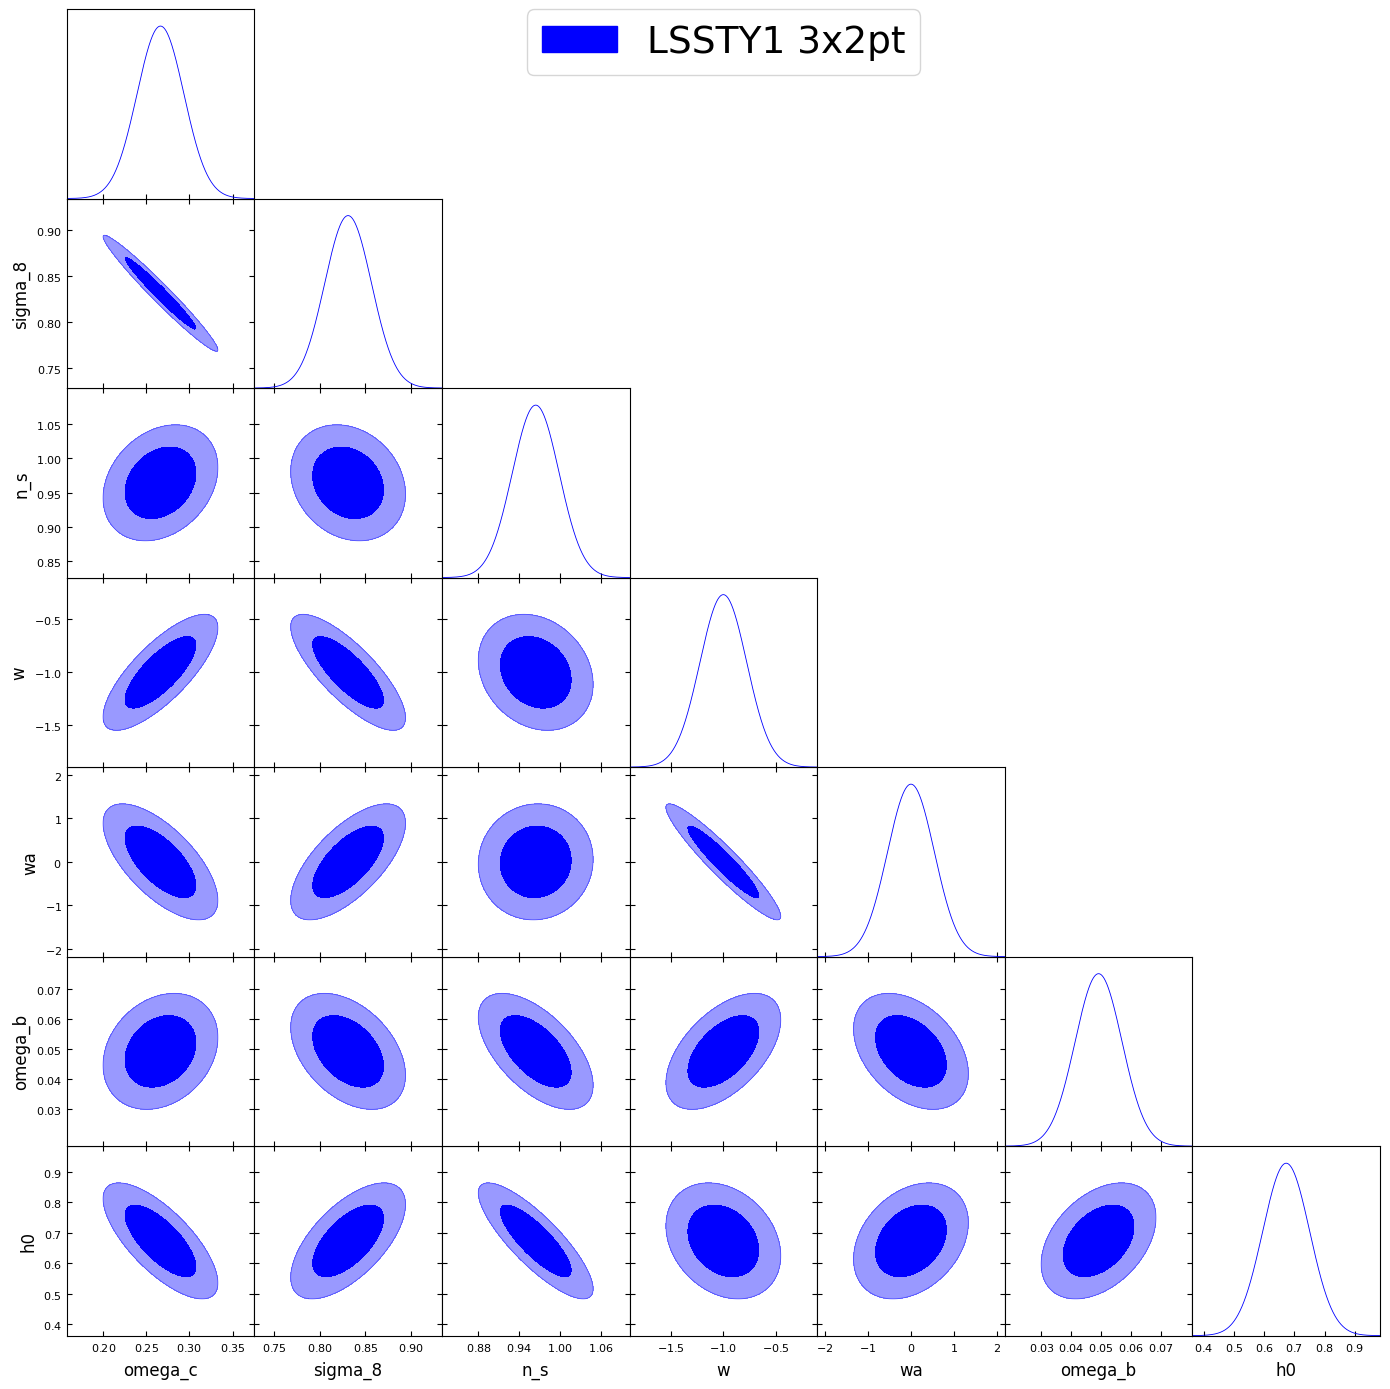

In [5]:
# Constructing a GaussianND object using fiducial values and the inverse Fisher matrix
# lsst_3x2pt_vary_param_fid_values.append(1.0)
lsst_3x2pt_fisher_contour = GaussianND(
    lsst_3x2pt_vary_param_fid_values[:7],
    lsst_3x2pt_fisher_df_inv[:7, :7],
    names=lsst_3x2pt_vary_param[:7],
)

# Initialize a subplot plotter for generating the plot
g = plots.get_subplot_plotter()

# Customize the plot settings
g.settings.figure_legend_frame = True
g.settings.axes_labelsize = 15
g.settings.legend_fontsize = 30

# Generate the triangle plot
g.triangle_plot(
    [lsst_3x2pt_fisher_contour],
    filled=True,
    legend_labels=["LSSTY1 3x2pt"],
    contour_colors=["blue"],
)

# Optional: Add parameter markers to the plot
# g.add_param_markers(lsst_3x2pt_vary_param_fid_values, color='black', ls='--')